In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1

## (a)

In [25]:
def arma_11(p0,p1,t1,ss,n):
    L=[]
    w=np.random.normal(0,ss**0.5,n+1)
    x0=0
    for t in range(1,n+1):
        xt=p0+p1*x0+w[t]+t1*w[t-1]
        L.append(xt)
        x0=xt
    return L

In [30]:
ar1=arma_11(1,0.6,0,1,500)

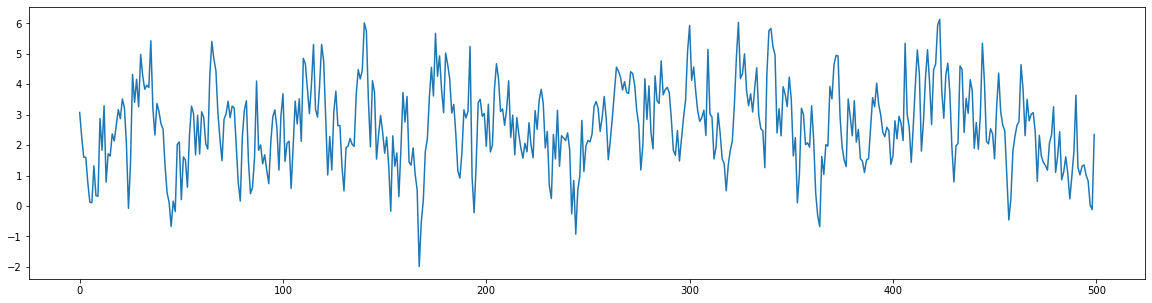

In [31]:
plt.figure(figsize=(20,5))
plt.plot(ar1)
plt.show()

In [22]:
def yw_ar_1(D):
    n=len(D)
    X=np.array(D)-np.mean(D)
    hat_p1=sm.tsa.stattools.acf(X)[1]
    hat_p0=np.mean(D)*(1-hat_p1)
    return hat_p0, hat_p1

In [32]:
def ERROR_one_step_forecast_yw1(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        yw = yw_ar_1(INS)
        Xt = INS[-1]
        Fore_one = mu + yw[1]*(Xt-mu)
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    print('MAE = ',MAE,
          'RMSE = ',RMSE)
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()

MAE =  0.8341876762775468 RMSE =  1.0124468243025229


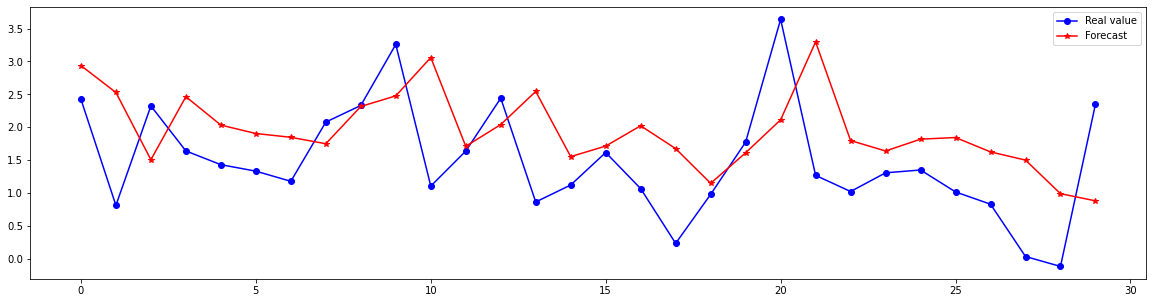

In [33]:
ERROR_one_step_forecast_yw1(ar1,30)

## (b)

In [17]:
def yw_ar_2(D):
    n=len(D)
    X=np.array(D)-np.mean(D)
    rho=sm.tsa.stattools.acf(X)
    B=np.zeros((2,1))
    A=np.zeros((2,2))
    for i in range(2):
        B[i][0]=rho[i+1]
        for j in range(2):
            A[i][j]=rho[i-j]
    A_inv=np.linalg.inv(np.array(A))
    B=np.array(B)
    phi=np.dot(A_inv, B)
    p1,p2=phi
    p0=np.mean(D)*(1-p1-p2)
    return p0,p1,p2

In [34]:
def ERROR_one_step_forecast_yw2(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        yw = yw_ar_2(INS)
        Xt = INS[-1]
        Xt1 = INS[-2]
        Fore_one = yw[0]+yw[1]*Xt+yw[2]*Xt1
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    print('MAE = ',MAE,
          'RMSE = ',RMSE)
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()

MAE =  0.8378215403210741 RMSE =  1.0162293909723799


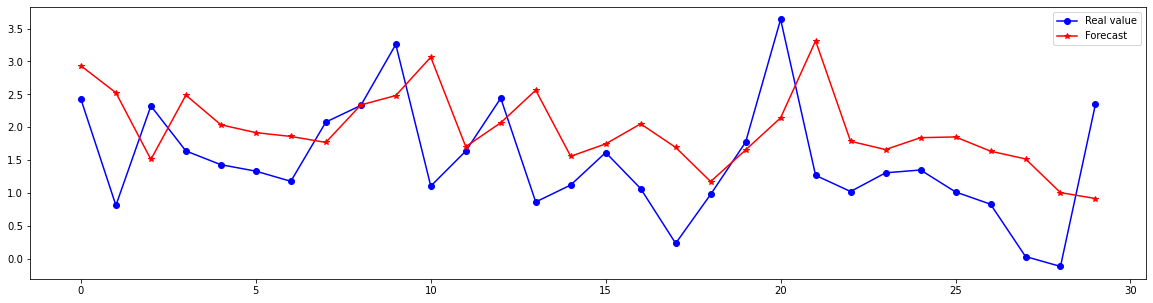

In [35]:
ERROR_one_step_forecast_yw2(ar1,30)

# 2

## (a)

In [1]:
def arma_22(p0,p1,p2,t1,t2,ss,n):
    L=[]
    w=np.random.normal(0,ss**0.5,n+2)
    x00,x0=0,0
    for t in range(1,n+1):
        xt=p0+p1*x0+p2*x00+w[t]+t1*w[t-1]+t2*w[t-2]
        L.append(xt)
        x00=x0
        x0=xt
    return L

In [4]:
ar2=arma_22(1,0.7,-0.2,0,0,1,500)

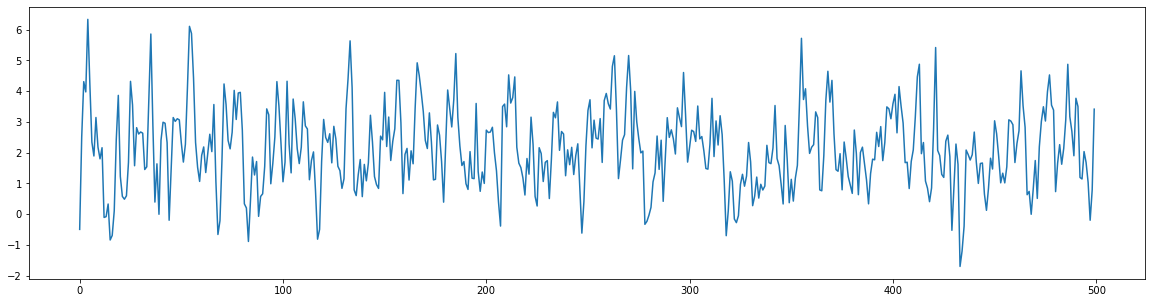

In [44]:
plt.figure(figsize=(20,5))
plt.plot(ar2)
plt.show()

In [14]:
def olse_ar_2(D):
    n=len(D)
    X=np.array(D)-np.mean(D)
    Z,xx=[],[]
    for t in range(2,n):
        zt=[X[t-1],X[t-2]]
        Z.append(zt)
        xx.append(X[t])
    Z=np.array(Z)
    xx=np.array(xx)
    f=np.dot(Z.T,Z)
    s=np.dot(Z.T,xx)
    olse=np.dot(np.linalg.inv(f),s)
    p1,p2=olse
    p0=np.mean(D)-(1-p1-p2)
    return p0,p1,p2

In [36]:
def ERROR_one_step_forecast_olse2(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        olse = olse_ar_2(INS)
        Xt = INS[-1]
        Xt1 = INS[-2]
        Fore_one = olse[0]+olse[1]*Xt+olse[2]*Xt1
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    print('MAE = ',MAE,
          'RMSE = ',RMSE)
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()

MAE =  0.8800497784321248 RMSE =  1.1297380648683688


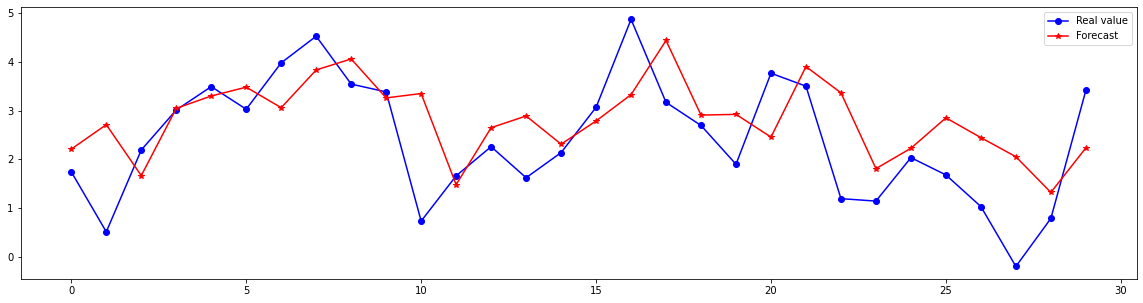

In [38]:
ERROR_one_step_forecast_olse2(ar2,30)

## (b)

MAE =  0.8562044493008922 RMSE =  1.0592643664792187


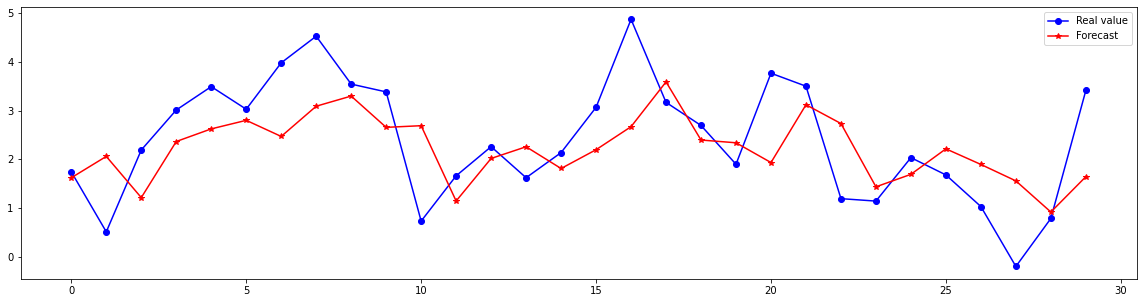

In [39]:
ERROR_one_step_forecast_yw2(ar2,30)

## (c)

MAE =  0.8561277692383016 RMSE =  1.0763246690482364


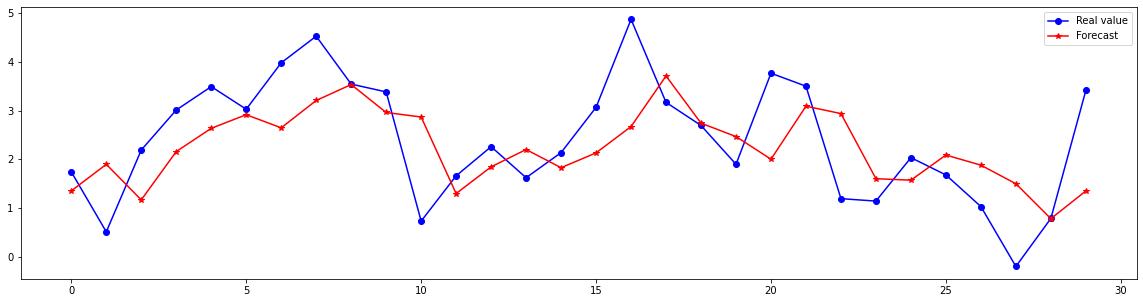

In [40]:
ERROR_one_step_forecast_yw1(ar2,30)

# 3

## (a)

In [57]:
ma1=arma_11(1,0,0.4,1,500)

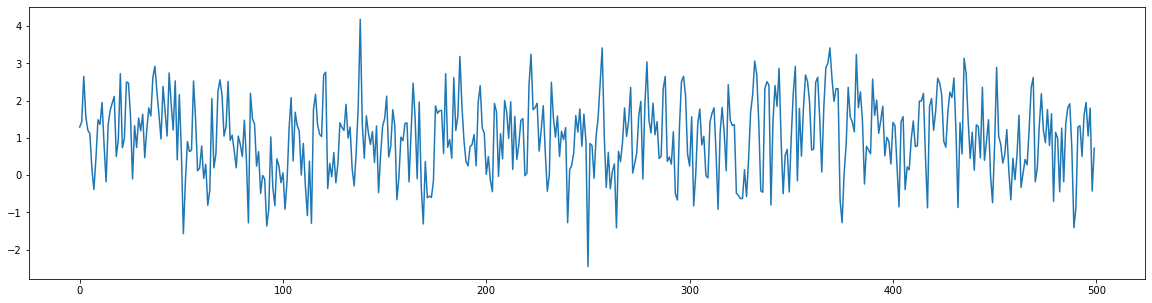

In [58]:
plt.figure(figsize=(20,5))
plt.plot(ma1)
plt.show()

In [47]:
def ma1_estimator(D):
    rho=sm.tsa.stattools.acf(D)
    if np.abs(rho[1])<0.5:
        hat_th_11=(1+np.sqrt(1-4*rho[1]**2))/2/rho[1]
        hat_th_12=(1-np.sqrt(1-4*rho[1]**2))/2/rho[1]
    else:
        print('DNE')
    return hat_th_11,hat_th_12

In [64]:
def ERROR_one_step_forecast_ma_est(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        ma_est=min(ma1_estimator(INS))
        Fore_one=0
        for j in range(1,len(INS)+1):
            Fore_one+=(-1)**(j-1)*ma_est**j*INS[-j]
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    print('MAE = ',MAE,
          'RMSE = ',RMSE)
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()

MAE =  1.0229579183014463 RMSE =  1.1437604744988534


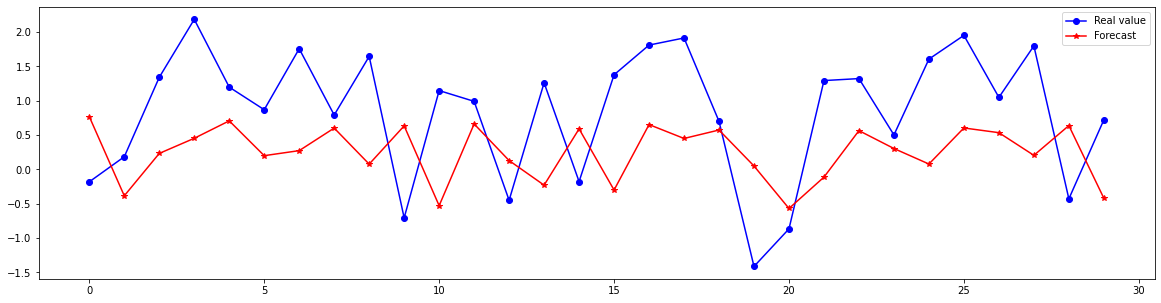

In [65]:
ERROR_one_step_forecast_ma_est(ma1,30)

## (b)

In [67]:
def olse_ar_1(D):
    n=len(D)
    X=np.array(D)-np.mean(D)
    ln,ld=[],[]
    for t in range(1,n):
        ln.append(X[t]*X[t-1])
        ld.append(X[t-1]**2)
    olse=sum(ln)/sum(ld)
    hatp0=np.mean(D)-(1-olse)
    return hatp0,olse

In [68]:
def ERROR_one_step_forecast_olse1(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        olse = olse_ar_1(INS)
        Xt = INS[-1]
        Fore_one = mu + olse[1]*(Xt-mu)
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    print('MAE = ',MAE,
          'RMSE = ',RMSE)
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()

MAE =  0.828518740344674 RMSE =  0.990542403968078


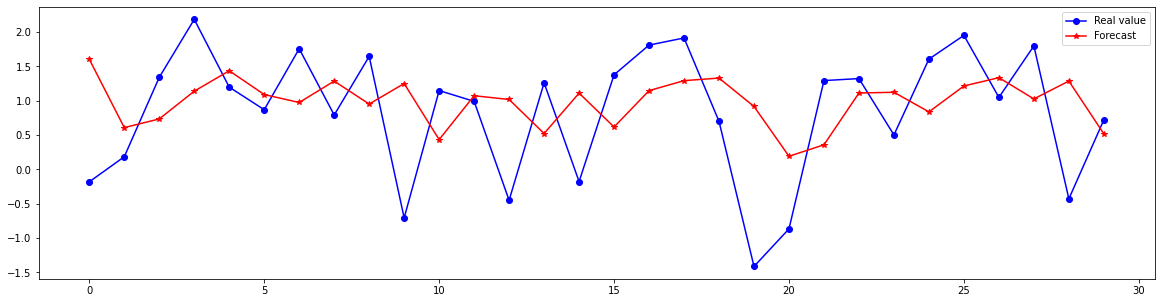

In [69]:
ERROR_one_step_forecast_olse1(ma1,30)

# 4

In [115]:
n=len(ar1)
x2=sum(ar1[1:])/(n-1)
x1=sum(ar1[:-1])/(n-1)

hat_phi=(sum(np.array(ar1[1:])*np.array(ar1[:-1]))-(n-1)*x1*x2)/(sum(np.array(ar1[1:])**2)-(n-1)*x1**2)
hat_alpha=x2-hat_phi*x1
hat_mu=hat_alpha/(1-hat_phi)
hat_sig=sum(((np.array(ar1[1:])-hat_mu)-hat_phi*(np.array(ar1[:-1])-hat_mu))**2)/(n-1)

print(' hat_alpha = ',hat_alpha,'\n','hat_mu = ',hat_mu,'\n','hat_phi = ',hat_phi,'\n','hat_sigma^2 = ',hat_sig)

 hat_alpha =  0.9349239971039898 
 hat_mu =  2.631752213700174 
 hat_phi =  0.6447522710394109 
 hat_sigma^2 =  1.1045143224967497


# 5

In [117]:
def mle_ar_1(D):
    n=len(D)
    x2=sum(D[1:])/(n-1)
    x1=sum(D[:-1])/(n-1)
    hat_phi=(sum(np.array(D[1:])*np.array(D[:-1]))-(n-1)*x1*x2)/(sum(np.array(D[1:])**2)-(n-1)*x1**2)
    return hat_phi

In [120]:
def ERROR_one_step_forecast(D,m):
    T = len(D)
    n = T - m
    Lr,Lf1,Lf2,Lf3,Le1,Le2,Le3 = [],[],[],[],[],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        yw = yw_ar_1(INS)
        olse = olse_ar_1(INS)
        mle = mle_ar_1(INS)
        Xt = INS[-1]
        Fore_one1 = mu + olse[1]*(Xt-mu)
        Fore_one2 = mu + yw[1]*(Xt-mu)
        Fore_one3 = mu + mle*(Xt-mu)
        Lr.append(Real_one)
        Lf1.append(Fore_one1)
        Lf2.append(Fore_one2)
        Lf3.append(Fore_one3)
        Le1.append(Real_one - Fore_one1)
        Le2.append(Real_one - Fore_one2)
        Le3.append(Real_one - Fore_one3)
    Le1 = np.array(Le1)
    Le2 = np.array(Le2)
    Le3 = np.array(Le3)
    MAE1 = np.mean(np.abs(Le1))
    RMSE1 = (np.mean(Le1**2))**0.5
    MAE2 = np.mean(np.abs(Le2))
    RMSE2 = (np.mean(Le2**2))**0.5
    MAE3 = np.mean(np.abs(Le3))
    RMSE3 = (np.mean(Le3**2))**0.5
    print('olse MAE = ',MAE1,
          'olse RMSE = ',RMSE1)
    print('yw MAE = ',MAE2,
          'yw RMSE = ',RMSE2)
    print('mle MAE = ',MAE3,
          'mle RMSE = ',RMSE3)
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf1, 'r', label = "olse Forecast", marker = '*')
    plt.plot(Lf2, 'g', label = "yw Forecast", marker = '*')
    plt.plot(Lf3, 'c', label = "mle Forecast", marker = '*')
    plt.legend()
    plt.show()

olse MAE =  0.833120008806478 olse RMSE =  1.0120902327685704
yw MAE =  0.8341876762775468 yw RMSE =  1.0124468243025229
mle MAE =  0.8310774233495504 mle RMSE =  1.0104634424944974


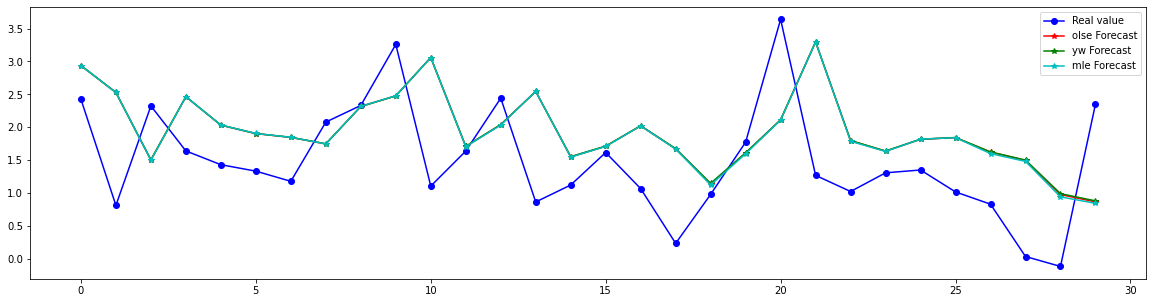

In [121]:
ERROR_one_step_forecast(ar1,30)

# 6

In [125]:
def ERROR_two_step_forecast(D,m):
    T = len(D)
    n = T - m - 1
    Lr,Lf1,Lf2,Lf3,Le1,Le2,Le3 = [],[],[],[],[],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n+1] #two step
        mu = np.mean(INS)
        yw = yw_ar_1(INS)
        olse = olse_ar_1(INS)
        mle = mle_ar_1(INS)
        Xt = INS[-1]
        Fore_one1 = mu + olse[1]**2*(Xt-mu)
        Fore_one2 = mu + yw[1]**2*(Xt-mu)
        Fore_one3 = mu + mle**2*(Xt-mu)
        Lr.append(Real_one)
        Lf1.append(Fore_one1)
        Lf2.append(Fore_one2)
        Lf3.append(Fore_one3)
        Le1.append(Real_one - Fore_one1)
        Le2.append(Real_one - Fore_one2)
        Le3.append(Real_one - Fore_one3)
    Le1 = np.array(Le1)
    Le2 = np.array(Le2)
    Le3 = np.array(Le3)
    MAE1 = np.mean(np.abs(Le1))
    RMSE1 = (np.mean(Le1**2))**0.5
    MAE2 = np.mean(np.abs(Le2))
    RMSE2 = (np.mean(Le2**2))**0.5
    MAE3 = np.mean(np.abs(Le3))
    RMSE3 = (np.mean(Le3**2))**0.5
    print('olse MAE = ',MAE1,
          'olse RMSE = ',RMSE1)
    print('yw MAE = ',MAE2,
          'yw RMSE = ',RMSE2)
    print('mle MAE = ',MAE3,
          'mle RMSE = ',RMSE3)
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf1, 'r', label = "olse Forecast", marker = '*')
    plt.plot(Lf2, 'g', label = "yw Forecast", marker = '*')
    plt.plot(Lf3, 'c', label = "mle Forecast", marker = '*')
    plt.legend()
    plt.show()

olse MAE =  1.0445314916862023 olse RMSE =  1.2111925442573028
yw MAE =  1.0447448959768 yw RMSE =  1.21193742942871
mle MAE =  1.0435780703218933 mle RMSE =  1.2080407282294536


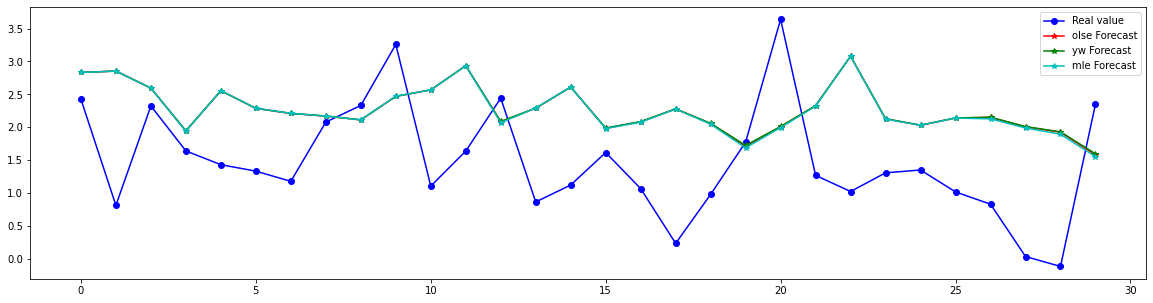

In [126]:
ERROR_two_step_forecast(ar1,30)